In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram

from scipy.cluster.vq import kmeans, vq
from scipy.cluster.vq import whiten

x =  [17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 84, 87, 83, 90, 97, 94, 88, 89, 93, 92, 82, 81, 92, 91, 22, 23, 25, 25, 27, 17, 17]
y = [4, 6, 0, 0, 4, 3, 1, 6, 5, 4, 6, 10, 8, 10, 97, 94, 99, 95, 95, 97, 99, 99, 94, 99, 90, 98, 100, 93, 98, 15, 10, 0, 10, 7, 17, 15]
comic_con = pd.DataFrame({"x_coordinate": x,
                         "y_coordinate": y
                         })
comic_con['x_coordinate'] = comic_con['x_coordinate'].astype('float32')
comic_con['y_coordinate'] = comic_con['y_coordinate'].astype('float32')
comic_con["x_scaled"] = whiten(comic_con["x_coordinate"])
comic_con["y_scaled"] = whiten(comic_con["y_coordinate"])


x = [39, 42, 58, 43, 13, 32, 60, 13, 26, 27, 29, 51, 14, 50, 62, 59, 50, 62, 65, 17, 25, 45, 55, 48, 42, 58, 68, 58, 37, 55]
y = [3, 7, 3, 3, 6, 5, 3, 4, 0, 9, 6, 3, 0, 7, 4, 1, 3, 0, 2, 5, 9, 5, 8, 6, 3, 1, 4, 2, 8, 7]
uniform_data = pd.DataFrame({"x_coordinate": x,
                         "y_coordinate": y
                         })
uniform_data['x_coordinate'] = uniform_data['x_coordinate'].astype('float32')
uniform_data['y_coordinate'] = uniform_data['y_coordinate'].astype('float32')
uniform_data["x_scaled"] = whiten(uniform_data["x_coordinate"])
uniform_data["y_scaled"] = whiten(uniform_data["y_coordinate"])

x = [33.875528010208775, 38.208747889149606, 35.740587879668375, 32.54696342954206, 62.06314582832662, 53.769683890896005, 32.49035021952977, 55.3252017626829, 68.10254176198403, 53.283123547122216, 67.71803005072717, 32.845502853646536, 61.78083409365266, 62.072467329911454, 37.2423104965403, 48.39279681160971, 35.48978845302275, 65.60854565818534, 38.02888393506392, 65.49367503080025, 41.60372438786939, 48.41398475297436, 41.81966990296046, 51.769182700772454, 45.179950587632945, 38.02218596797351, 56.37185205882892, 52.05250382127925, 44.24373638076516, 40.33281190433085, 53.59657550320356, 45.872652957168775, 54.000011702824835, 52.6886879008935, 53.25422917515853, 63.54212627168273, 65.38884629108937, 49.7331204244559, 48.58080531427996, 48.03000662249777, 44.667125096576456, 65.30935895573465, 40.58584806552085, 43.935337781568315, 32.873749638659994, 43.17638645624066, 61.44735547191348, 47.902126357633676, 47.572750544262746, 50.65221646915222, 45.446521013813914, 48.17757170967687, 50.11893027842959, 37.33082580526986, 53.28605844737083, 32.606017427486364, 46.59545711595761, 54.91413224060491, 61.18758173081231, 62.25623799525337, 47.807103448547345, 65.44265167099898, 36.17446484734976, 60.90339817677179, 44.238116884086224, 40.34232188761509, 57.1991023845528, 36.08806304674293, 35.56663866798864, 42.41968176650849, 59.65269146405017, 32.624629292084094, 55.802169917560185, 65.49918670396143, 45.54670963865595, 61.005369016634205, 58.19939103997329, 63.119317713784035, 55.317083131439325, 45.609472159593864, 45.63141644596187, 46.74818574516722, 68.2835242879107, 61.96714674680341, 48.961046192567, 45.37856387981091, 50.841168640885435, 52.56595620799083, 39.13493120568782, 48.991763726168436, 58.05200857676577, 41.37122590593515, 64.3514005533457, 35.02226785177038, 48.60847434578881, 42.6486493170514, 57.584951487904185, 49.08107020583896, 51.426592405160875, 62.315517190744416, 26.840752816458078, 26.951941203374947, 32.5621398164603, 27.108845406070458, 20.77972887648475, 34.64864231015485, 27.334714397277274, 38.63528805644043, 27.362780877847065, 22.25173068139633, 23.561817911734813, 28.6834020635391, 33.84077612867423, 28.223160262959322, 38.08583937546411, 29.88562783705242, 28.408504942406417, 31.72078699025845, 25.21073980042423, 28.676889274075087, 32.248620751649284, 26.387527137544257, 28.699010037068682, 26.075497431739343, 34.287109826660135, 24.026824037174762, 30.83187786615126, 32.37571558869186, 22.76230802134732, 35.251223510448035, 70.1823912319945, 79.58988481728986, 65.72716493320895, 68.48339899780753, 76.4135846784469, 79.26874522519233, 64.84182258980695, 71.11774101770646, 78.34020407876903, 63.61846310591197, 67.53968320798616, 69.1508780470645, 67.79213380348288, 76.87140430526, 62.00437158352073, 67.49125960815724, 71.90747912630009, 65.27576084118527, 77.58529514762616, 79.66066417912315, 77.32463519764799, 68.5790017971886, 65.9764957476465, 71.55575552204994, 69.83671682593541, 70.4943218813415, 72.62743438217248, 67.66970193136962, 63.44559188910216, 75.45783601312209, ]
y = [44.89342094946078, 41.11632695012222, 57.41800587821296, 57.21808248658115, 47.19694447881652, 35.9519591663506, 42.0218536061098, 52.548322206341886, 52.31212455866878, 31.63628689308561, 47.605248069586594, 54.23496141308666, 60.824987602248825, 65.23558661122223, 48.237577085508796, 67.52456486435298, 54.10211413900534, 51.8513512002574, 39.82817720810414, 44.28386899368546, 60.21348801168716, 45.355137861258946, 35.81066078526795, 56.95992181229278, 61.05673695261803, 44.34557019681759, 49.53371077686823, 57.76601797690635, 41.7427565034216, 52.07742896956642, 55.58701182345966, 43.81629666563168, 61.46690780645113, 44.3775923583563, 44.722751130263774, 47.98225455002846, 47.73690085784043, 46.049823776856826, 56.78708412569725, 56.60380297058407, 61.716042124809185, 56.52781556973503, 45.81317068292476, 49.107768819361304, 41.14505631914088, 64.84595736862047, 62.46952021318698, 58.299124711890485, 48.533208073849394, 48.79467674278415, 40.65821117776538, 30.466588286384656, 65.1805398242621, 41.73000679928131, 69.24321762302908, 56.00106984258167, 39.63738121453994, 38.404587085375475, 39.63915234786564, 38.73957077928137, 36.00996935366802, 45.627290421255125, 57.17020664932346, 51.32130044599607, 40.89880525190646, 41.15484687210742, 58.21497749474327, 43.45728537166188, 42.722747180257315, 39.27124659372834, 42.66172394093738, 57.407147546037336, 34.25546896017839, 61.2946118575901, 30.513927856422505, 65.03769516099436, 63.378856912574534, 62.926205725335116, 35.88019396665801, 52.89656062679065, 37.259020806758414, 31.67028002331956, 47.16555533297543, 50.8823970375166, 41.77975390328266, 49.38557057141355, 52.58865855257825, 40.89034885614024, 65.91171887261399, 46.57669291055369, 63.5556821473357, 45.45012239907503, 43.705265331740556, 46.58949706968058, 38.91660455701806, 55.46764508050404, 67.89462117284727, 36.02362380728002, 59.985360625320176, 54.70049854246623, 82.72356822426191, 77.9444363345605, 75.40050306769567, 68.91634077469779, 72.84274950158657, 74.71747015717696, 70.61496974587016, 76.12679437605598, 80.60280864557596, 70.19696261830036, 68.23133122814531, 83.83579386727436, 83.97371742515891, 70.71122298781704, 72.22425104319395, 79.61715461567954, 74.81720151229194, 81.28549433293101, 79.839476126322, 82.54505219682139, 72.41216493735487, 74.60395650171206, 68.84261456484317, 73.28936759848196, 80.51600556553831, 82.6396572856646, 66.38754731793188, 73.35737436223333, 72.53759838415348, 73.71960774659767, 78.16166533096742, 75.99349930565272, 67.237386284613, 82.50606008627572, 77.72556254117448, 73.68057342677461, 83.33967752728628, 84.67897397759208, 71.78110971610965, 68.1659101899457, 83.8792565462558, 74.22367681669748, 78.1526834527262, 74.21207006805605, 75.13106435618263, 77.71960453281291, 71.08256275442666, 74.66344797163669, 80.35559980446331, 73.34017066404198, 70.12614603304121, 77.46797550765935, 77.65232497035855, 76.70948616089562, 73.94355101042667, 71.19864360817556, 76.4341868745873, 70.62890953003463, 78.5744388997699, 68.4489350236011, ]
mouse = pd.DataFrame({"x_coordinate": x,
                         "y_coordinate": y
                         })
mouse['x_coordinate'] = mouse['x_coordinate'].astype('float32')
mouse['y_coordinate'] = mouse['y_coordinate'].astype('float32')
mouse["x_scaled"] = whiten(mouse["x_coordinate"])
mouse["y_scaled"] = whiten(mouse["y_coordinate"])

## K-means clustering: first exercise
### This exercise will familiarize you with the usage of k-means clustering on a dataset. Let us use the Comic Con dataset and check how k-means clustering works on it.

## Recall the two steps of k-means clustering:
### Define cluster centers through kmeans() function. It has two required arguments: observations and number of clusters.
### Assign cluster labels through the vq() function. It has two required arguments: observations and cluster centers.
### The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

### Instructions
-    Import kmeans and vq functions in SciPy.
-    Generate cluster centers using the kmeans() function with two clusters.
-    Create cluster labels using these cluster centers.

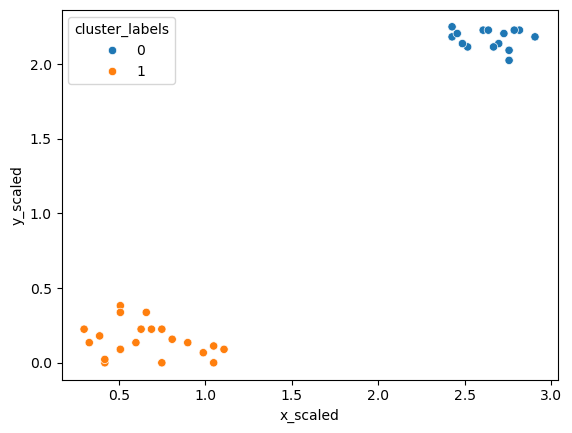

In [2]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[["x_scaled", "y_scaled"]], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

## Elbow method on distinct clusters
### Let us use the comic con dataset to see how the elbow plot looks on a dataset with distinct, well-defined clusters. You may want to display the data points before proceeding with the exercise.

### The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

### Instructions 1/2
-    Create a list of distortions for each cluster in num_clusters.
-    Create a DataFrame elbow_plot with num_clusters and distortions.
-    With the .lineplot() method, plot elbow_plot with num_clusters in the x axis and distortions in the y axis.

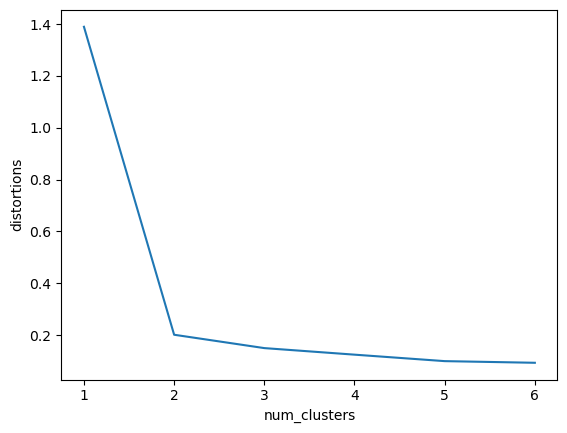

In [3]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[["x_scaled", "y_scaled"]], i)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

## Elbow method on uniform data
### In the earlier exercise, you constructed an elbow plot on data with well-defined clusters. Let us now see how the elbow plot looks on a dataset with uniformly distributed points. You may want to display the data points in the IPython Shell before proceeding with the exercise.

### The data is stored in a pandas DataFrame, uniform_data. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of points.

### Instructions 1/2
-    Create a list of distortions for each cluster in num_clusters.
-    Create a DataFrame elbow_plot with num_clusters and distortions.
-    With the .lineplot() method, plot elbow_plot with num_clusters in the x axis and distortions in the y axis.

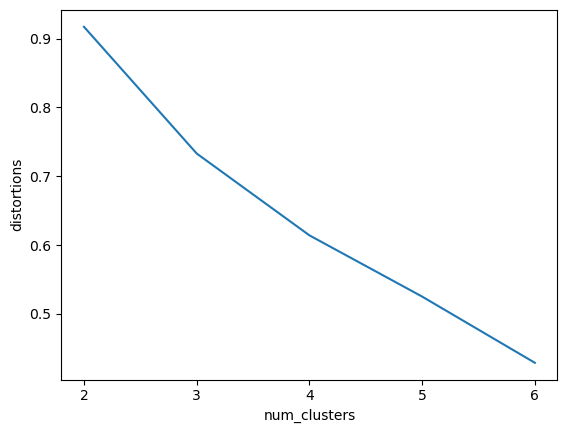

In [4]:
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[["x_scaled", "y_scaled"]], i)
    distortions.append(distortion)

# Create a DataFrame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

## Impact of seeds on distinct clusters
### You noticed the impact of seeds on a dataset that did not have well-defined groups of clusters. In this exercise, you will explore whether seeds impact the clusters in the Comic Con data, where the clusters are well-defined.

### The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

### Instructions 1/2
-    Import the random class from numpy and initialize the seed with the integer 0.

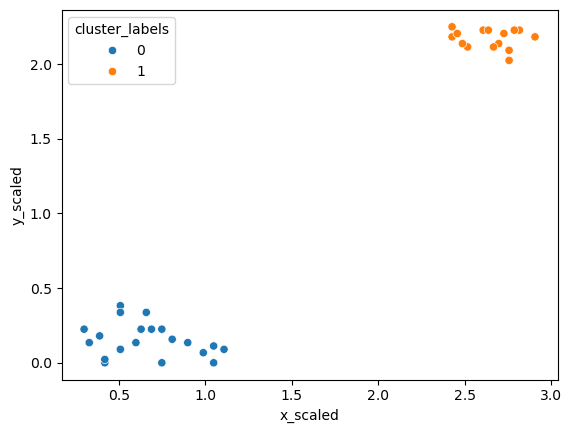

In [5]:
# Import random class
from numpy import random

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

-    Change your code from the earlier step so that the seed is initialized with a list [1, 2, 1000]

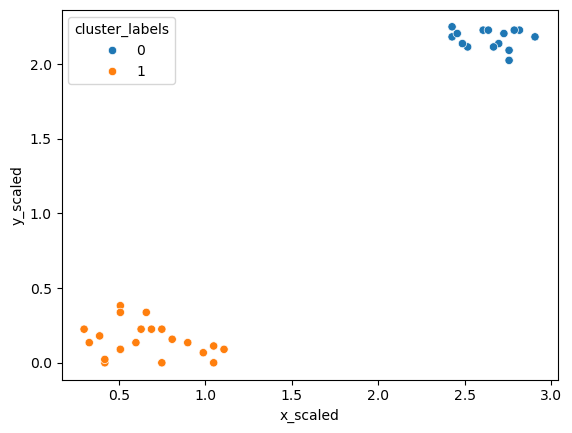

In [6]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

## Uniform clustering patterns
### Now that you are familiar with the impact of seeds, let us look at the bias in k-means clustering towards the formation of uniform clusters.

### Let us use a mouse-like dataset for our next exercise. A mouse-like dataset is a group of points that resemble the head of a mouse: it has three clusters of points arranged in circles, one each for the face and two ears of a mouse.

### Here is how a typical mouse-like dataset looks like (Source). [Image skipped]

### The data is stored in a pandas DataFrame, mouse. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of the data points.

### Instructions
-    Import kmeans and vq functions in SciPy.
-    Generate cluster centers using the kmeans() function with three clusters.
-    Create cluster labels with vq() with the cluster centers generated above.

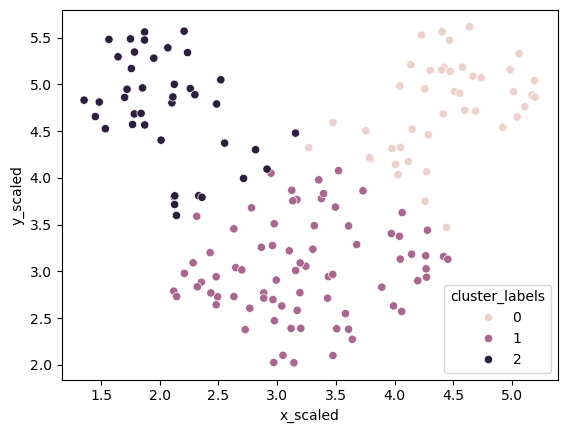

In [7]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled', 'y_scaled']], 3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = mouse)
plt.show()

## FIFA 18: defenders revisited
### In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:
### -    defending: a number which signifies the defending attributes of a player
### -    physical: a number which signifies the physical attributes of a player

### These are typically defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.
### The following modules have been pre-loaded: kmeans, vq from scipy.cluster.vq, matplotlib.pyplot as plt, seaborn as sns. The data for this exercise is stored in a pandas DataFrame, fifa. The scaled variables are scaled_def and scaled_phy.

### Instructions 1/4
-    Initialize the random seed to the list [1000,2000].

In [9]:
fifa = pd.read_csv("../../data/fifa_18_sample_data.csv")
fifa['phy'] = fifa['phy'].astype('float32')
fifa['def'] = fifa['def'].astype('float32')
fifa["scaled_phy"] = whiten(fifa["phy"])
fifa["scaled_def"] = whiten(fifa["def"])

In [10]:
# Set up a random seed in numpy
random.seed([1000,2000])

### Instructions 2/4
-    Fit the scaled data in columns scaled_def and scaled_phy into a k-means clustering algorithm with 3 clusters and assign cluster labels.

In [11]:
# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'],_ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

### Instructions 3/4
-    Display cluster centers of each cluster with respect to the scaled columns by calculating the mean value for each cluster.

In [12]:
# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

                scaled_def  scaled_phy
cluster_labels                        
0                 2.067430    9.055970
1                 1.946013    7.159409
2                 3.814488    9.023954


### Instructions 4/4
-    Create a seaborn scatter plot with scaled_def on the x-axis and scaled_phy on the y-axis, with each cluster represented by a different color.

                scaled_def  scaled_phy
cluster_labels                        
0                 2.067430    9.055970
1                 1.946013    7.159409
2                 3.814488    9.023954


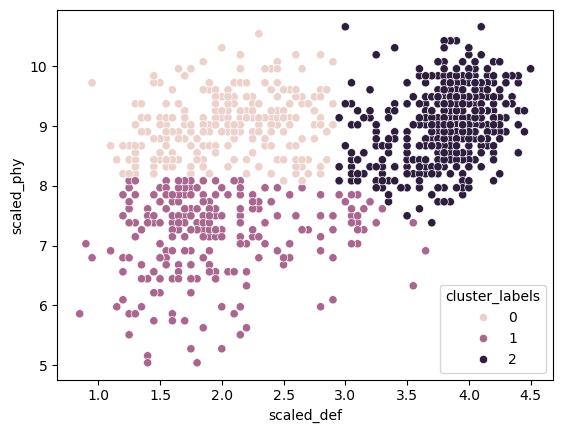

In [13]:
# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()